# Main parameter space figures

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
import numpy as np
from scipy import interpolate

from matplotlib import rc, rcParams
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import pathos.multiprocessing as mp
from pathos.multiprocessing import ProcessingPool as Pool

from functools import partial

from particle import *
from particle import literals as lp

from HNL_MC import *
from HNL_MC.plot_tools import *
from HNL_MC.const import *

from Nlimits import *
from Nlimits.constraint_dict import *
from Nlimits.plotter import *

from utils_limits import *

# Minimal model -- mixing with muon

In [40]:
table = np.load("limits_computed/T2K_minimal_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_weak, event_rate_weak = table

table_ps191 = np.load("limits_computed/PS191_minimal_Umu4.npy", allow_pickle=True)
m4_grid_ps191, usqr_grid_ps191, lifetime_weak_ps191, event_rate_weak_ps191 = table_ps191

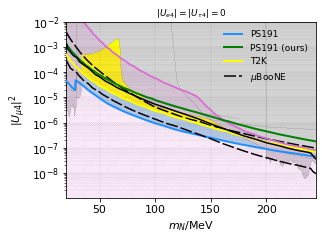

In [57]:
######
fig, ax = std_fig()

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_charged_pion - m_mu)*1e3), 1000, endpoint=True)

###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)


############################################
# PS191 rescaled
N_observed = 30 # before handscan
no_bkg, all_bkg = get_PS191_limit(x*1e-3, nevent_for_new_limit = np.sqrt(N_observed))
_, all_sig = get_PS191_limit(x*1e-3, nevent_for_new_limit = N_observed+np.sqrt(N_observed))

ax.fill_between(x, np.ones(len(no_bkg)), no_bkg, facecolor='lightblue', lw=0.0,zorder=0)
# ax.fill_between(x, no_bkg, all_bkg, facecolor='lightblue', lw=0.0, label=r'PS191')
# ax.fill_between(x, all_bkg, all_sig, facecolor='lightblue', lw=0.0)
ax.plot(x, no_bkg, color='dodgerblue', ls='-', zorder=10, label=r'PS191',lw=2)
# ax.plot(x, all_bkg, color='dodgerblue', ls='--', zorder=10)
# ax.plot(x, all_sig, color='dodgerblue', dashes=(2,1), zorder=10)

############################################
# our PS191 bound (our own calculation)
Xi,Yi,Zi=interp_grid(x=m4_grid_ps191*1e3, y=usqr_grid_ps191 , z=event_rate_weak_ps191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='green',lw=0, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='green', label=r'PS191 (ours)', lw=2, zorder=10)


############################################
# our T2K bound -- Weak Interaction only
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_weak, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='yellow',lw=0, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='yellow', label=r'T2K', lw=2, zorder=10)

#########################
# MuBooNE
this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
# this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
f = interpolate.interp1d(np.log10(m4), np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value='extrapolate', assume_sorted=False)    
# ax.fill_between(x, 10**f(np.log10(x)), np.ones(len(f(x))), fc='orange', ec='darkorange', alpha=0.3, )
ax.plot(x, 10**f(np.log10(x)), c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE')
# ax.fill_between(x, 10**f(np.log10(x)), np.ones(len(x)), fc='green', lw=0, zorder=0)


############################################
# BBN -- tau = 0.023 s
BBNCOLOR='orchid'
matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
matplotlib.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=lifetime_weak, logx=True, logy=True)
level_1 = contour(Xi, Yi, Zi, levels = [0.023], colors=[BBNCOLOR], linestyles=['-']) #NEW CONSTRAINT
_ = contourf(Xi, Yi, Zi, levels = [0.023,np.inf], colors=['None'], alpha=0, hatches=['/////////////'], linestyles=['-'], zorder=1) #NEW CONSTRAINT
bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c=BBNCOLOR,  lw=1.5)
# ax.plot(bound[:,0],bound[:,1], c=BBNCOLOR, label=r'$\tau < 0.023$ s', lw=1.5)

# test against boyarki's
# mbound,ubound = np.genfromtxt('digitized/Boyarsky_et_al/BBN_Umu4_lower_bound.dat',unpack=True)
# plt.plot(mbound*1e3,ubound, c='green',lw=1)

# T2K bound
# ax.plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
#                                                           channels=np.arange(10), 
#                                                           modes=modes_dirac, 
#                                                           mode_weights=weights_modes_dirac)),
#             label=r'T2K', c='purple')

####
# labels
ax.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$",fontsize=9)
ax.legend(loc='upper right', frameon=False, framealpha=1, edgecolor='None', facecolor='white', ncol=1, fontsize=9)


e_t2k,u_t2k=np.genfromtxt("limits_computed/finalT2K.csv", unpack=True, delimiter=",")
ax.plot(e_t2k, u_t2k, c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE',zorder=100)


e_t2k,u_t2k=np.genfromtxt("limits_computed/currentT2K.csv", unpack=True, delimiter=",")
ax.plot(e_t2k, u_t2k, c='black', dashes=(1,0), lw=1.5, label=r'$\mu$BooNE',zorder=100)



ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-9,1e-2)
# ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")
ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
# ax.set_xticks(np.array([0.02, 0.04, 0.06, 0.08, 0.1, m_neutral_pion-m_mu, m_neutral_kaon-m_mu-m_neutral_pion])*1e3)
# ax.set_xticklabels(np.array([0.02, 0.04, 0.06, 0.08, 0.1, r'$m_\pi-m_\mu$', r'$m_K - (m_\mu+m_\pi)$']), rotation = -30)
ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
ax.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
fig.savefig('plots/weak_decays.pdf')
fig.savefig('plots/weak_decays.png', dpi=400)

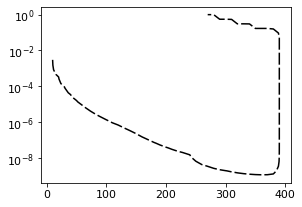

In [55]:
fig,ax=std_fig()
e_t2k,u_t2k=np.genfromtxt("limits_computed/finalT2K.csv", unpack=True, delimiter=",")
ax.plot(e_t2k, u_t2k, c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE')
ax.set_yscale("log")

# Magnetic moment transition

In [58]:
table = np.load("limits_computed/T2K_mag_mom_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_mag_mom, event_rate_mag_mom = table

table_ps191 = np.load("limits_computed/PS191_mag_mom_Umu4.npy", allow_pickle=True)
m4_grid_PS191, usqr_grid_PS191, lifetime_mag_mom_PS191, event_rate_mag_mom_PS191 = table_ps191

In [59]:
hnl_tools.get_event_rate((0.1,1e-4), flavor_struct=[0.0,1.0,0.0], dipoles=[0,0,0], GX=0, exp_setup = exp.PS191)

350.0513705569524

In [60]:
hnl_tools.get_event_rate((0.3,1e-4), flavor_struct=[0.0,1.0,0.0], dipoles=[0,0,0], GX=0, exp_setup = exp.ND280_FHC)

527854485.454475

In [61]:
event_rate_mag_mom_PS191[usqr_grid<1e-3]

array([1.36262855e-05, 2.19743816e-05, 3.38234219e-05, ...,
       1.09631479e+06, 8.73342547e+05, 6.91663500e+05])

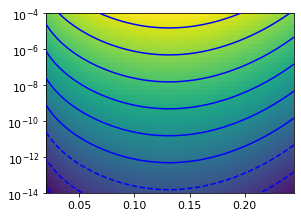

In [62]:
plt.scatter(m4_grid_PS191, usqr_grid_PS191, c=np.log10(event_rate_mag_mom_PS191),zorder=-1)
Xi,Yi,Zi=interp_grid(x=m4_grid_PS191, y=usqr_grid_PS191 , z=np.log10(event_rate_mag_mom_PS191), logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = 10, zorder=15, colors=['blue']) #NEW CONSTRAINT

plt.yscale("log")
# plt.xscale("log")

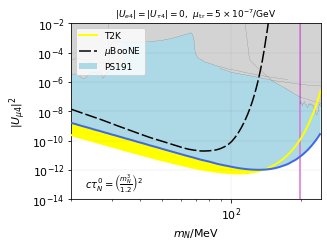

In [135]:
######
fig, ax = std_fig()

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_charged_pion - m_mu)*1e3), 1000, endpoint=True)


###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)



############################################
# our T2K bound -- magnetic moment
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_mag_mom, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[0], zorder=10) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='yellow',lw=0, zorder=0)
ax.plot(bound[:,0],bound[:,1], c='yellow', label=r'T2K', lw=2, zorder=10)

############################################
# our PS191 bound -- magnetic moment
Xi,Yi,Zi=interp_grid(x=m4_grid_PS191*1e3, y=usqr_grid_PS191 , z=event_rate_mag_mom_PS191, logx=False, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['royalblue'], linewidths=[2], zorder=15) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='lightblue',lw=0, zorder=0, label=r'PS191')
# ax.plot(bound[:,0],bound[:,1], c='dodgerblue', label=r'ps191my', lw=2, zorder=15)
# print(bound[:,1])

#########################
# MuBooNE
dip = 5e-7
new_muboone_bound = rescale_muboone(x*1e-3, dipoles=[0,dip,0])
ax.plot(x, new_muboone_bound, c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE',zorder=100)
# ax.fill_between(x, 10**f(np.log10(x)), np.ones(len(x)), fc='green', lw=0, zorder=0)

############################################
# BBN -- tau = 0.023 s
BBNCOLOR='orchid'
matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
matplotlib.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=c_LIGHT*lifetime_mag_mom, logx=False, logy=True)
level_1 = contour(Xi, Yi, Zi, levels = [100], colors=['None'], linestyles=['-']) #NEW CONSTRAINT
# _ = contourf(Xi, Yi, Zi, levels = [100,np.inf], colors=['None'], alpha=0, hatches=['/////////////'], linestyles=['-'], zorder=1) #NEW CONSTRAINT
bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.vlines(bound[0,0],0,1, colors=BBNCOLOR,  lw=1.5)


####
# labels
ax.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$,  $\mu_{\rm tr} = 5\times 10^{-7}/$GeV",fontsize=9)
ax.legend(loc='upper left', frameon=True, ncol=1, fontsize=9)
ax.annotate(r"$c\tau^0_N = \left(\frac{m_N^3}{1.2}\right)^2$", xy = (23,0.5e-13))

ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-14,1e-2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")
# ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
# ax.set_xticks(np.array([0.02, 0.04, 0.06, 0.08, 0.1, m_neutral_pion-m_mu, m_neutral_kaon-m_mu-m_neutral_pion])*1e3)
# ax.set_xticklabels(np.array([0.02, 0.04, 0.06, 0.08, 0.1, r'$m_\pi-m_\mu$', r'$m_K - (m_\mu+m_\pi)$']), rotation = -30)
ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
ax.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
fig.savefig('plots/dipole_decays.pdf')
fig.savefig('plots/dipole_decays.png', dpi=400)

1292765.5589014788
0.020000000000000004 11.81397648642935
1279716.5397836287
0.020050189368886452 11.78450463112883
1266799.1920381964
0.020100504686410368 11.755106802176591
1254012.1871639907
0.020150946268635873 11.725782814905234
1241354.2100640652
0.020201514432420256 11.696532485111195
1228823.9589104636
0.020252209495415945 11.66735562905361
1216420.1450103256
0.0203030317760725 11.638252063453148
1204141.492673346
0.020353981593638635 11.609221605490868
1191986.7390805723
0.020405059268164195 11.58026407280706
1179954.6341545251
0.020456265120502186 11.551379283500113
1168043.940430629
0.020507599472310782 11.522567056125368
1156253.4329299396
0.020559062646055355 11.493827209693965
1144581.8990331604
0.020610654965010484 11.465159563671728
1133028.138355926
0.020662376753261998 11.436563937978017
1121590.962625342
0.020714228335709014 11.408040152984595
1110269.195557779
0.020766210038065967 11.37958802951451
1099061.672737892
0.02081832218686467 11.351207388840963
1087967.241

115382.7658396862
0.036315244808153395 6.531767555896499
114215.93353811395
0.03640637676904731 6.515600231470259
113060.88436817117
0.03649773742272135 6.499473835882962
111917.49941659189
0.036589327343072846 6.483388267833937
110785.66096984429
0.03668114710543928 6.467343426278983
109665.25250202701
0.03677319728660194 6.45133921042973
108556.15866288787
0.03686547846478951 6.435375519753002
107458.26526596324
0.036957991219681754 6.419452253970193
106371.45927683708
0.0370507361324131 6.403569313056627
105295.62880151902
0.03714371378557632 6.387726597240941
104230.66307493878
0.037236924763226174 6.37192400700445
103176.45251681899
0.0373303696508831 6.356161443080527
102132.88852423734
0.03742404903553689 6.340438806453972
101099.86364313695
0.03751796350565035 6.324755998360399
100077.27151143261
0.03761211365116305 6.309112920285607
99065.0068401511
0.03770650006349492 6.293509473964976
98062.96540260386
0.03780112333555011 6.2779455613828326
97071.04402367088
0.03789598406172

19028.626460395575
0.05659140637426149 4.224944870127483
18835.369712403295
0.05673342072277754 4.214654079105168
18644.06851803406
0.056875791451819833 4.204389763141461
18454.703125191398
0.057018519455714047 4.194151857759335
18267.253980190202
0.057161605631030156 4.183940298647664
18081.70172659083
0.05730505087658804 4.173755021660821
17898.027203312504
0.05744885609346314 4.163595962818276
17716.21144266233
0.05759302218499212 4.153463058304192
17536.23566838423
0.057737550056778525 4.143356244467024
17358.081293727457
0.05788244061669851 4.1332754578191215
17181.729919534762
0.05802769477490649 4.123220635036327
17007.163332349635
0.058173313443840906 4.113191712957581
16834.363502542863
0.05831929753822991 4.103188628584519
16663.31258245777
0.058465647975097165 4.093211319081086
16493.992904574396
0.05861236567376754 4.0832597217731355
16326.386979691926
0.05875945155587296 4.073333774148032
16160.477495129737
0.058906906545358136 4.063433413854266
15996.247312946363
0.059054

3034.508885862751
0.08863167641885301 2.75038121130467
3003.342223029982
0.08885409481399355 2.743942906424099
2972.4926431768217
0.08907707136107812 2.7375218380824933
2941.956935071832
0.08930060746077141 2.7311179659448337
2911.7319199323492
0.08952470451725306 2.7247312497841185
2881.8144510969646
0.08974936393822641 2.7183616494811162
2852.201413701282
0.08997458713492743 2.7120091250241116
2822.8897243569563
0.09020037552213347 2.705673636508654
2793.876330833961
0.09042673051817232 2.699355144137304
2765.1582117460916
0.09065365354493093 2.6930536082193917
2736.7323762395904
0.09088114602786448 2.6867689891707576
2708.595863684961
0.0911092093960053 2.68050124751351
2680.745743371875
0.09133784508197175 2.6742503438757765
2653.1791142071397
0.0915670545219774 2.668016238991452
2625.8931045588442
0.09179683915583986 2.6617988936999613
2598.884871606102
0.09202720042699 2.6555982689460005
2572.1516012422735
0.09225813978248089 2.6494143257793046
2545.690507883293
0.092489658672996

536.234063921262
0.1343622167355823 1.8905425434763412
530.5774624235353
0.13469939447858945 1.8864869073364012
524.9791283916579
0.13503741835850283 1.8824431214813229
519.4384680797993
0.1353762904986763 1.878411160509386
513.9548937804763
0.13571601302779218 1.8743909990931495
508.5278237632468
0.1360565880798747 1.870382611979293
503.1566821961926
0.13639801779430336 1.866385973988458
497.84089907682124
0.13674030431582632 1.862401060015092
492.57991018308206
0.13708344979457393 1.8584278450272862
487.3731570115384
0.13742745638607232 1.8544663040666227
482.2200867195663
0.13777232625125668 1.8505164122480156
477.12015206813055
0.13811806155648512 1.8465781447595548
472.0728113651413
0.13846466447355216 1.8426514768623505
467.0775284093848
0.13881213717970223 1.8387363838903783
462.13377243501446
0.13916048185764368 1.8348328412503223
457.24101805660746
0.13950970069556218 1.8309408244214234
452.39874521477293
0.13985979588713457 1.8270603089553228
447.606439228925
0.14021076963154

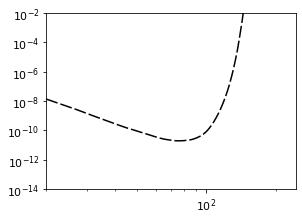

In [111]:
fig, ax = std_fig()

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_charged_pion - m_mu)*1e3), 1000, endpoint=True)

dip = 5e-7
new_muboone_bound = rescale_muboone(x*1e-3, dipoles=[0,dip,0])
ax.plot(x, new_muboone_bound, c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE',zorder=100)

ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-14,1e-2)
ax.set_xscale("log")
ax.set_yscale("log")


In [110]:
mN=0.1
EN = (m_neutral_kaon**2 + mN**2-m_mu**2)/2/m_neutral_kaon
gamma = EN/mN

print(gamma*c_LIGHT*hnl_tools.get_lifetime((mN,1e-5), flavor_struct=[0.0,1.0,0.0], dipoles=[0,0,0], GX=0)/1e2)
print(gamma*c_LIGHT*hnl_tools.get_lifetime((mN,1e-5), flavor_struct=[0.0,1.0,0.0], dipoles=[0,5e-7,0], GX=0)/1e2)

94267061.84612486
20.17904249598253


# Dark Z' model

In [733]:
table = np.load("limits_computed/T2K_zprime_Umu4.npy", allow_pickle=True)
m4_grid, usqr_grid, lifetime_zprime, event_rate_zprime = table
GX=100*Gf

<ipython-input-734-fddfdfe667ee>:13: UserWarning: linewidths is ignored by contourf
  level_0 = contourf(Xi, Yi, Zi, levels = [2.3,np.inf], colors=['yellow'], linewidths=[0], zorder=0) #NEW CONSTRAINT


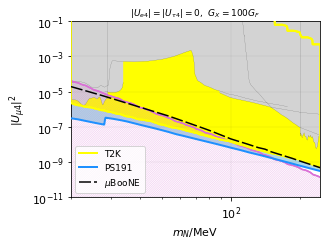

In [734]:
######
fig, ax = std_fig()

# HNL mass span
x = np.logspace(np.log10(20),np.log10((m_neutral_kaon - m_charged_pion - m_mu)*1e3), 1000, endpoint=True)



############################################
# our T2K bound -- Zprime
Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=event_rate_zprime, logx=True, logy=True)
level_0 = contour(Xi, Yi, Zi, levels = [2.3], colors=['yellow'], linewidths=[2], zorder=10) #NEW CONSTRAINT
level_0 = contourf(Xi, Yi, Zi, levels = [2.3,np.inf], colors=['yellow'], linewidths=[0], zorder=0) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.fill_between(bound[:,0],bound[:,1],bound[:,1]/bound[:,1], fc='yellow',lw=0, zorder=1)
ax.plot(bound[:,0],bound[:,1], c='yellow', label=r'T2K', lw=2, zorder=10)


###################################
# plot all existing constraints

list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
LW = 0.1
# _ = plot_bound(ax, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(ax, list_of_bounds['PSI_87'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PS191'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['KEK'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['NA62_21'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_lowT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['PIENU_19_highT'], units=1e3, lw=LW)
_ = plot_bound(ax, list_of_bounds['deGouvea_lowmass'], units=1e3, lw=LW)


############################################
# PS191 rescaled
N_observed = 30 # before handscan
no_bkg, all_bkg = get_PS191_limit(x*1e-3, nevent_for_new_limit = np.sqrt(N_observed))
_, all_sig = get_PS191_limit(x*1e-3, nevent_for_new_limit = N_observed+np.sqrt(N_observed))

no_bkg /= np.sqrt(ratio_gamma_nuee)
all_bkg /= np.sqrt(ratio_gamma_nuee)
all_sig /= np.sqrt(ratio_gamma_nuee)

ax.fill_between(x, np.ones(len(no_bkg)), no_bkg, facecolor='lightblue', lw=0.0,zorder=0)
# ax.fill_between(x, no_bkg, all_bkg, facecolor='lightblue', lw=0.0, label=r'PS191')
# ax.fill_between(x, all_bkg, all_sig, facecolor='lightblue', lw=0.0)
ax.plot(x, no_bkg, color='dodgerblue', ls='-', zorder=10, label=r'PS191',lw=2)
# ax.plot(x, all_bkg, color='dodgerblue', ls='--', zorder=10)
# ax.plot(x, all_sig, color='', dashes=(2,1), zorder=10)

#########################
# MuBooNE
this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
# this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
f = interpolate.interp1d(np.log10(m4), np.log10(Umu4sq), kind='linear', bounds_error=False, fill_value='extrapolate', assume_sorted=False)    
ratio_gamma_nuee = hnl_tools.get_gamma_nuee((0.1,1e-6), flavor_struct=[0.0,1.0,0.0], GX=GX)/hnl_tools.get_gamma_nuee((0.1,1e-6), flavor_struct=[0.0,1.0,0.0], GX=0)
new_muboone_bound = 10**f(np.log10(x))/np.sqrt(ratio_gamma_nuee)
ax.plot(x, new_muboone_bound, c='black', dashes=(8,2), lw=1.5, label=r'$\mu$BooNE', zorder=20)
# ax.fill_between(x, 10**f(np.log10(x)), np.ones(len(x)), fc='green', lw=0, zorder=0)





############################################
# BBN -- tau = 0.023 s
BBNCOLOR='orchid'
matplotlib.rcParams['hatch.color'] = BBNCOLOR  # previous pdf hatch linewidth
matplotlib.rcParams['hatch.linewidth'] = 0.2  # previous pdf hatch linewidth

Xi,Yi,Zi=interp_grid(x=m4_grid*1e3, y=usqr_grid , z=lifetime_zprime, logx=True, logy=True)
level_1 = contour(Xi, Yi, Zi, levels = [0.023], colors=[BBNCOLOR], linestyles=['-']) #NEW CONSTRAINT
_ = contourf(Xi, Yi, Zi, levels = [0.023,np.inf], colors=['None'], alpha=0, hatches=['/////////////'], linestyles=['-'], zorder=1) #NEW CONSTRAINT
bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c=BBNCOLOR,  lw=1.5)
# ax.plot(bound[:,0],bound[:,1], c=BBNCOLOR, label=r'$\tau < 0.023$ s', lw=1.5)

####
# labels
ax.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$,  $G_X = 100 G_F$",fontsize=9)
ax.legend(loc='lower left', frameon=True, ncol=1, fontsize=9)

ax.set_xlim(np.min(x),np.max(x))
ax.set_ylim(1e-11,1e-1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$|U_{\mu 4}|^2$")
ax.set_xlabel(r"$m_{N}$/MeV")
# ax.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
# ax.set_xticks(np.array([0.02, 0.04, 0.06, 0.08, 0.1, m_neutral_pion-m_mu, m_neutral_kaon-m_mu-m_neutral_pion])*1e3)
# ax.set_xticklabels(np.array([0.02, 0.04, 0.06, 0.08, 0.1, r'$m_\pi-m_\mu$', r'$m_K - (m_\mu+m_\pi)$']), rotation = -30)
ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
ax.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
fig.savefig('plots/dark_decays.pdf')
fig.savefig('plots/dark_decays.png', dpi=400)